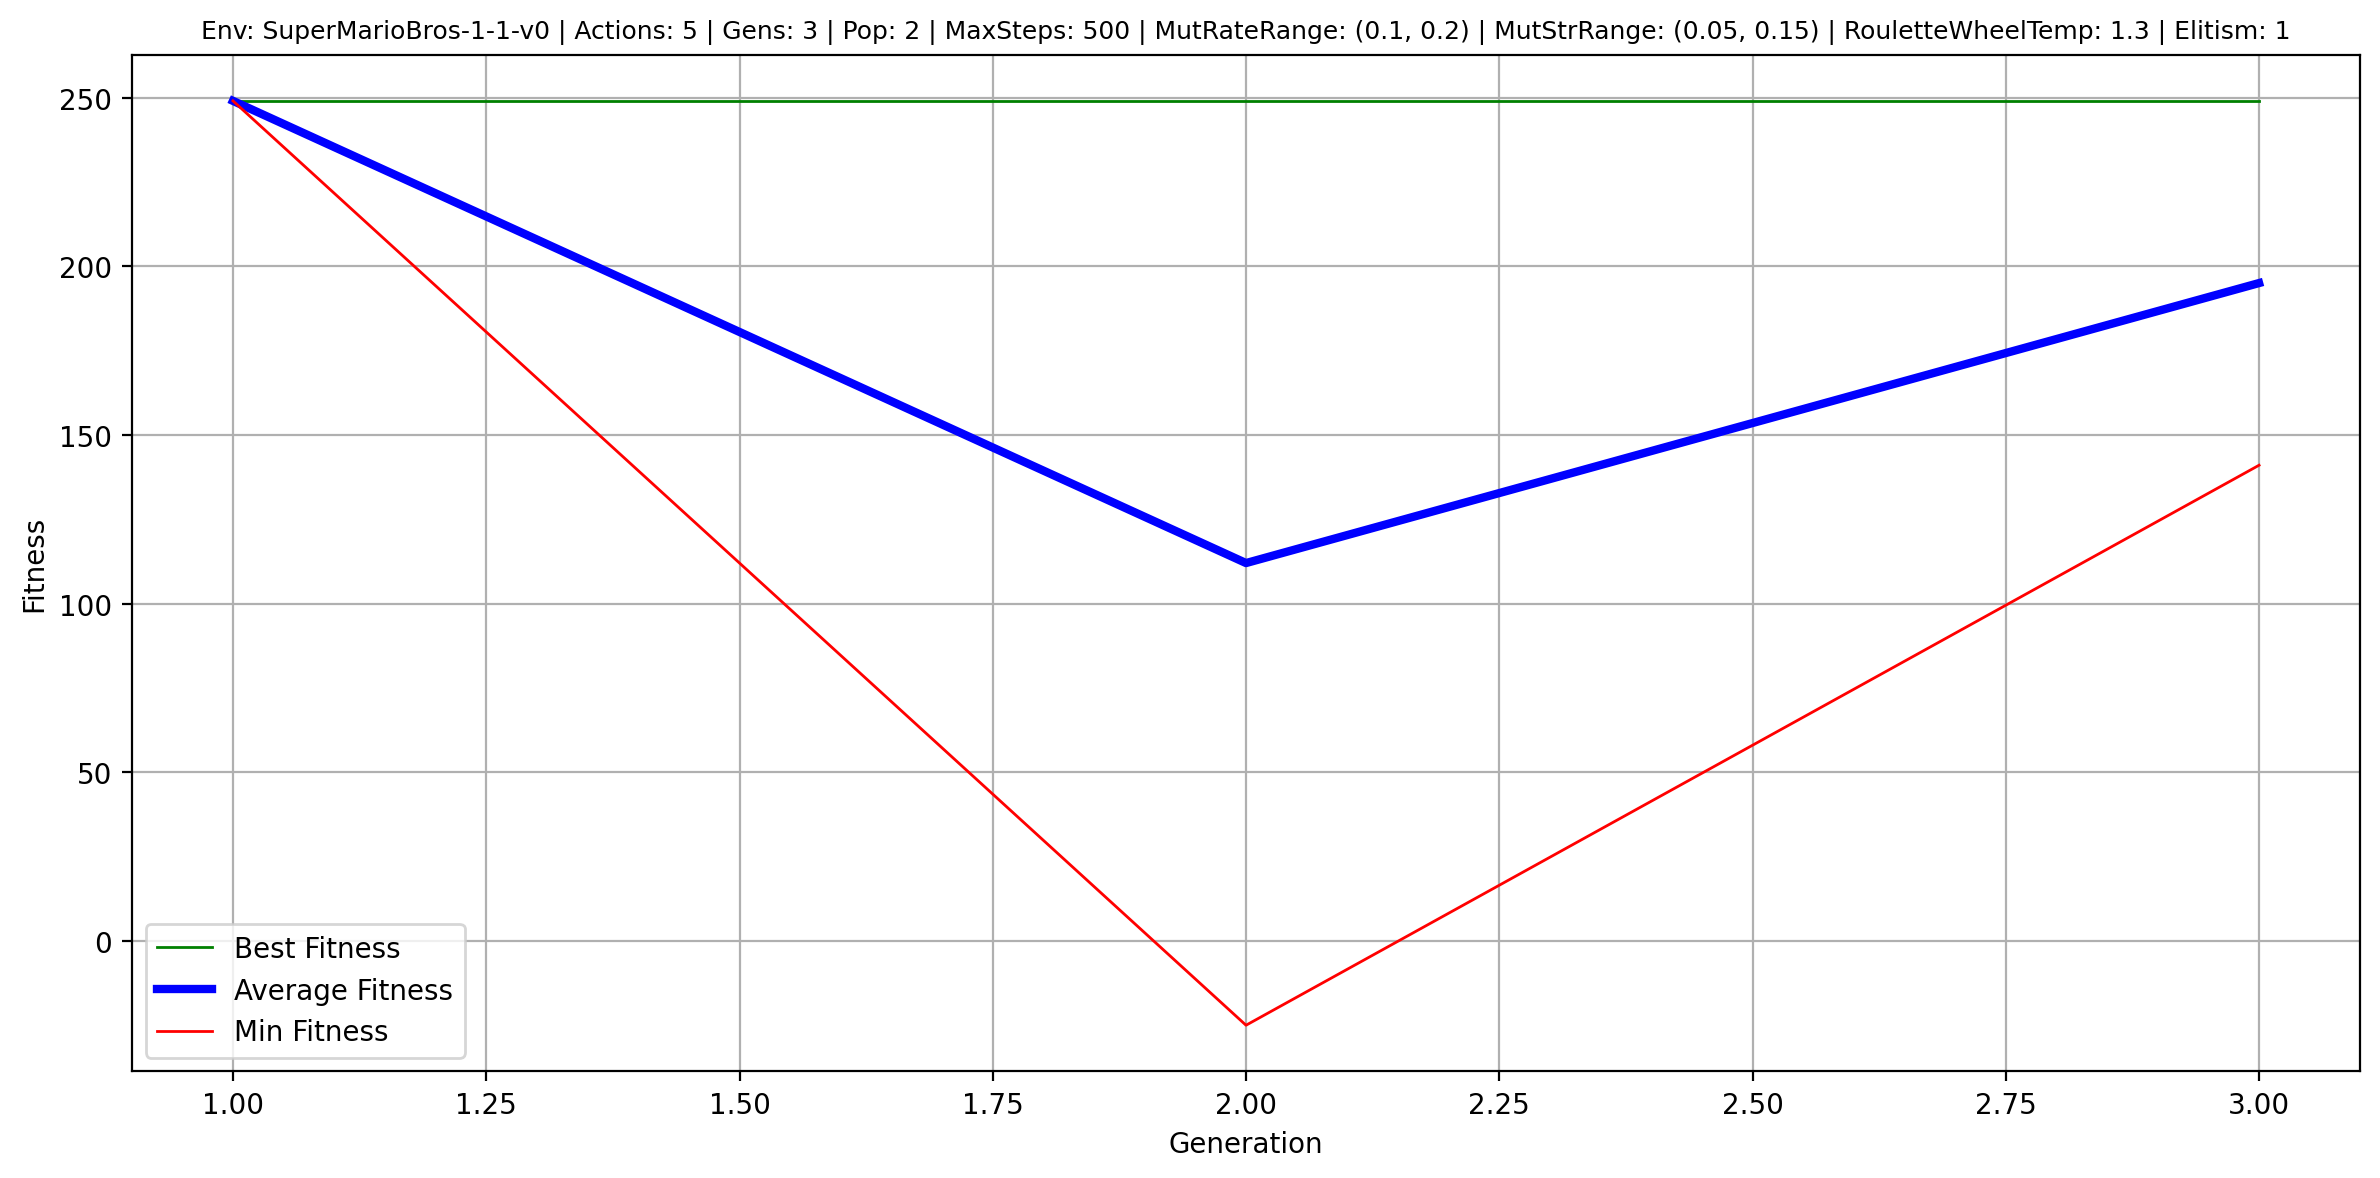

/Users/babajane/miniconda3/envs/mario/lib/python3.10/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /Users/babajane/Library/Mobile Documents/com~apple~CloudDocs/realRoot/uni/mac/6Semester/cognitiveComputing/SuperMarioReinforcementLearningProject/runs/neuroevolution/development/max_fit_249__avg_fit_185__env_name_SuperMarioBros-1-1-v0__action_set_5 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/Users/babajane/miniconda3/envs/mario/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:57: DeprecationWarning: WARN: `env.metadata["render.modes"] is marked as deprecated and will be replaced with `env.metadata["render_modes"]` see https://github.com/openai/gym/pull/2654 for more details
  logger.deprecation(
/Users/babajane/miniconda3/envs/mario/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:130: DeprecationWarning: WARN: `env.meta


Running best agent for recording...

Final fitness: 249.00
Video saved to: ../../runs/neuroevolution/development/max_fit_249__avg_fit_185__env_name_SuperMarioBros-1-1-v0__action_set_5/fitness_249.0.mp4
Fitness plot saved to ../../runs/neuroevolution/development/max_fit_249__avg_fit_185__env_name_SuperMarioBros-1-1-v0__action_set_5/fitness_plot.png
Best model saved to ../../runs/neuroevolution/development/max_fit_249__avg_fit_185__env_name_SuperMarioBros-1-1-v0__action_set_5/best_model_249.0.pt


In [2]:
from src.non_reinforcement.neuroevolution.neuroevolution_trainer import NeuroevolutionTrainer
from src.non_reinforcement.neuroevolution.neuroevolution_net import NeuroevolutionNet
from gym_super_mario_bros.actions import RIGHT_ONLY
%config InlineBackend.figure_format = 'retina'

# Constants
CNN_CONFIG = [
    {"out_channels": 16, "kernel_size": 8, "stride": 4},
    {"out_channels": 32, "kernel_size": 4, "stride": 2},
]
MLP_CONFIG = [
    32 * 9 * 9,  # Must match flattened output of CNN
    256,
    128,
    len(RIGHT_ONLY)
]
MODEL = NeuroevolutionNet(
    input_channels=1,
    num_actions=len(RIGHT_ONLY),
    cnn_config=CNN_CONFIG,
    mlp_config=MLP_CONFIG
)
ENV_NAME = 'SuperMarioBros-1-1-v0'
ACTION_SET = RIGHT_ONLY
DEVICE = "cpu"
DIRECTORY = "../../runs/neuroevolution/development"
GENERATIONS = 3
POPULATION_SIZE = 2
MAX_STEPS_PER_EPISODE = 500
MUTATION_RATE_RANGE = (0.1, 0.2)
MUTATION_STRENGTH_RANGE = (0.05, 0.15)
ROULETTE_WHEEL_SELECTION_TEMPERATURE = 1.3
ELITISM = 1
MUTATION_RATE_SIGMOID_DECAY = {"a": 1.0, "b": 1.0, "c": 1.0}
MUTATION_STRENGTH_SIGMOID_DECAY = {"a": 1.0, "b": 1.0, "c": 1.0}

trainer = NeuroevolutionTrainer(
    base_model=MODEL,
    env_name=ENV_NAME,
    action_set=ACTION_SET,
    device=DEVICE,
    directory=DIRECTORY,
    generations=GENERATIONS,
    population_size=POPULATION_SIZE,
    max_steps_per_episode=MAX_STEPS_PER_EPISODE,
    mutation_rate_range=MUTATION_RATE_RANGE,
    mutation_strength_range=MUTATION_STRENGTH_RANGE,
    roulette_wheel_selection_temperature=ROULETTE_WHEEL_SELECTION_TEMPERATURE,
    elitism=ELITISM,
    mutation_rate_sigmoid_decay=MUTATION_RATE_SIGMOID_DECAY,  # Optional
    mutation_strength_sigmoid_decay=MUTATION_STRENGTH_SIGMOID_DECAY  # Optional
)

#trainer.load_model("../runs/neuroevolution/exploitation_test_1/max_fit_2749__avg_fit_609__env_name_SuperMarioBros-1-1-v0__action_set_5/best_model_2749.0.pt")
trainer.run()
trainer.record_best_agent()
trainer.save_metrics()
trainer.save_best_model()